In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set basic style for better-looking plots
plt.style.use('default')

# Read the data
df = pd.read_csv('brain_size_data.csv')

# Display the first few rows and basic information about the dataset
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nBasic statistics:")
print(df.describe())

First few rows of the dataset:
     phylum     class  order             family        genus  \
0  Chordata  Amphibia  Anura            Hylidae         Hyla   
1  Chordata  Amphibia  Anura            Hylidae   Pseudacris   
2  Chordata  Amphibia  Anura            Hylidae        Acris   
3  Chordata  Amphibia  Anura  Ceratobatrachidae  Platymantis   
4  Chordata  Amphibia  Anura            Ranidae         Rana   

                 species specificEpithet  sex  sampleSizeValue  \
0        Hyla versicolor      versicolor  NaN                1   
1  Pseudacris triseriata      triseriata  NaN                3   
2        Acris crepitans       crepitans  NaN                3   
3  Platymantis vitiensis       vitiensis  NaN                1   
4         Rana sylvatica       sylvatica  NaN                3   

              inTextReference  ... mass-specific metabolic rate - units  \
0  Taylor, Nol, & Boire, 1995  ...                                  NaN   
1  Taylor, Nol, & Boire, 1995  ...   

=== Checking for crow data ===

Unique bird families in the dataset:
['Casuariidae' 'Megapodiidae' 'Phasianidae' 'Anseranatidae' 'Anatidae'
 'Phaethontidae' 'Podicipedidae' 'Columbidae' 'Podargidae' 'Caprimulgidae'
 'Aegothelidae' 'Apodidae' 'Oceanitidae' 'Diomedeidae' 'Procellariidae'
 'Spheniscidae' 'Fregatidae' 'Sulidae' 'Anhingidae' 'Phalacrocoracidae'
 'Pelecanidae' 'Ardeidae' 'Threskiornithidae' 'Pandionidae' 'Accipitridae'
 'Falconidae' 'Gruidae' 'Rallidae' 'Otididae' 'Burhinidae'
 'Haematopodidae' 'Recurvirostridae' 'Charadriidae' 'Pedionomidae'
 'Jacanidae' 'Rostratulidae' 'Scolopacidae' 'Turnicidae' 'Glareolidae'
 'Stercorariidae' 'Laridae' 'Cacatuidae' 'Psittaculidae' 'Psittacidae'
 'Cuculidae' 'Strigidae' 'Tytonidae' 'Alcedinidae' 'Meropidae'
 'Coraciidae' 'Pittidae' 'Menuridae' 'Atrichorniithidae' 'Climacteridae'
 'Ptilonorhynchidae' 'Maluridae' 'Dasyornithidae' 'Acanthizidae'
 'Pardalotidae' 'Meliphagidae' 'Pomatostomidae' 'Orthonychidae'
 'Psophodidae' 'Neosittidae' 'Cam

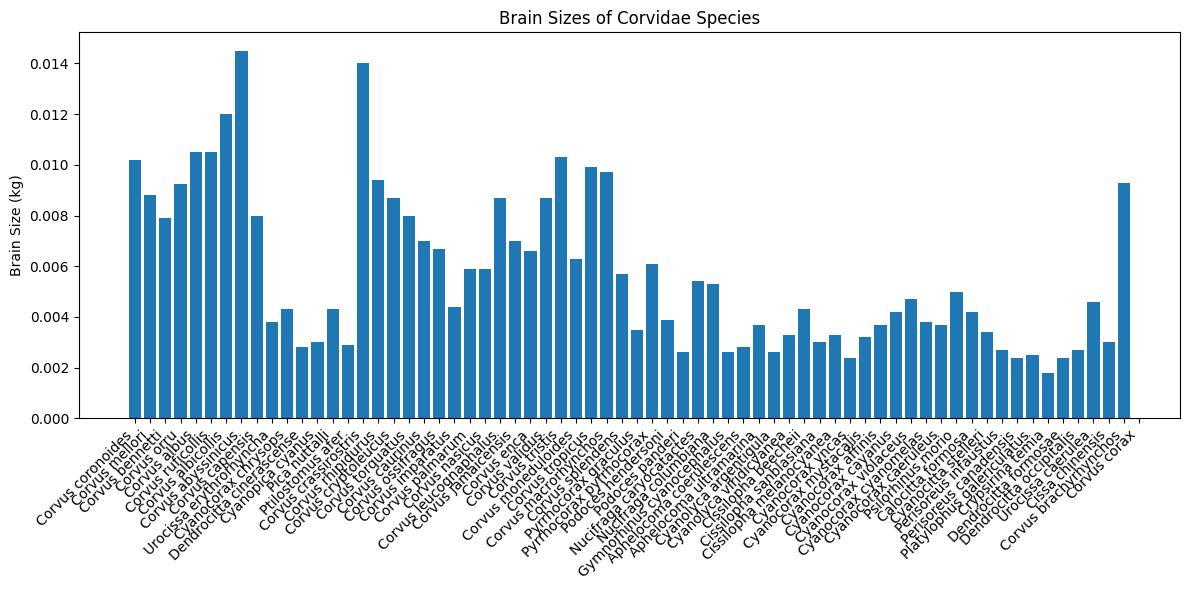

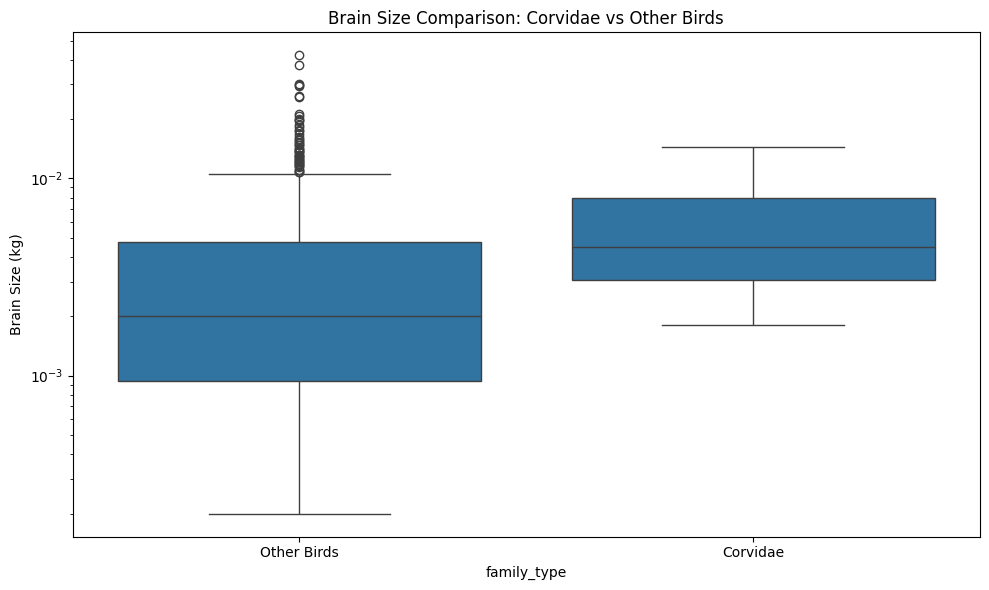

In [ ]:
# Let's check for crow-related data
print("=== Checking for crow data ===")
print("\nUnique bird families in the dataset:")
bird_families = df[df['class'] == 'Aves']['family'].unique()
print(bird_families)

print("\nChecking specifically for Corvidae (crow family):")
corvidae_data = df[df['family'] == 'Corvidae']
print("\nNumber of Corvidae samples:", len(corvidae_data))

if len(corvidae_data) > 0:
    print("\nCorvidae species in the dataset:")
    print(corvidae_data[['genus', 'species', 'brain size', 'brain size - units']].to_string())
    
    # Create a bar plot of brain sizes for Corvidae species
    plt.figure(figsize=(12, 6))
    plt.bar(corvidae_data['species'], corvidae_data['brain size'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Brain Sizes of Corvidae Species')
    plt.ylabel('Brain Size (kg)')
    plt.tight_layout()
    plt.show()
    
    # Compare corvidae brain sizes to other birds
    bird_data = df[df['class'] == 'Aves'].copy()
    bird_data['family_type'] = bird_data['family'].apply(lambda x: 'Corvidae' if x == 'Corvidae' else 'Other Birds')
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=bird_data, x='family_type', y='brain size')
    plt.title('Brain Size Comparison: Corvidae vs Other Birds')
    plt.ylabel('Brain Size (kg)')
    plt.yscale('log')  # Using log scale due to potential large variations
    plt.tight_layout()
    plt.show()

=== Analysis of Corvidae Brain Sizes ===

Brain sizes by genus within Corvidae:
            brain size                
                 count    mean     std
genus                                 
Aphelocoma           2  0.0032  0.0006
Calocitta            1  0.0042     NaN
Cissa                1  0.0030     NaN
Cissilopha           3  0.0035  0.0007
Corvus              30  0.0086  0.0023
Crypsirina           1  0.0018     NaN
Cyanocitta           1  0.0034     NaN
Cyanocorax           9  0.0036  0.0008
Cyanolyca            2  0.0030  0.0005
Cyanopica            2  0.0028  0.0002
Dendrocitta          3  0.0026  0.0002
Gymnorhinus          1  0.0026     NaN
Nucifraga            2  0.0054  0.0001
Perisoreus           2  0.0026  0.0002
Pica                 1  0.0043     NaN
Platylophus          1  0.0025     NaN
Podoces              2  0.0032  0.0009
Psilorhinus          1  0.0050     NaN
Ptilostomus          1  0.0029     NaN
Pyrrhocorax          2  0.0048  0.0018
Urocissa             2 

/var/folders/sb/__tj9b7x1wg868jd8n44ffth0000gp/T/ipykernel_6341/1904411522.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corvidae_data['genus_type'] = corvidae_data['genus'].apply(


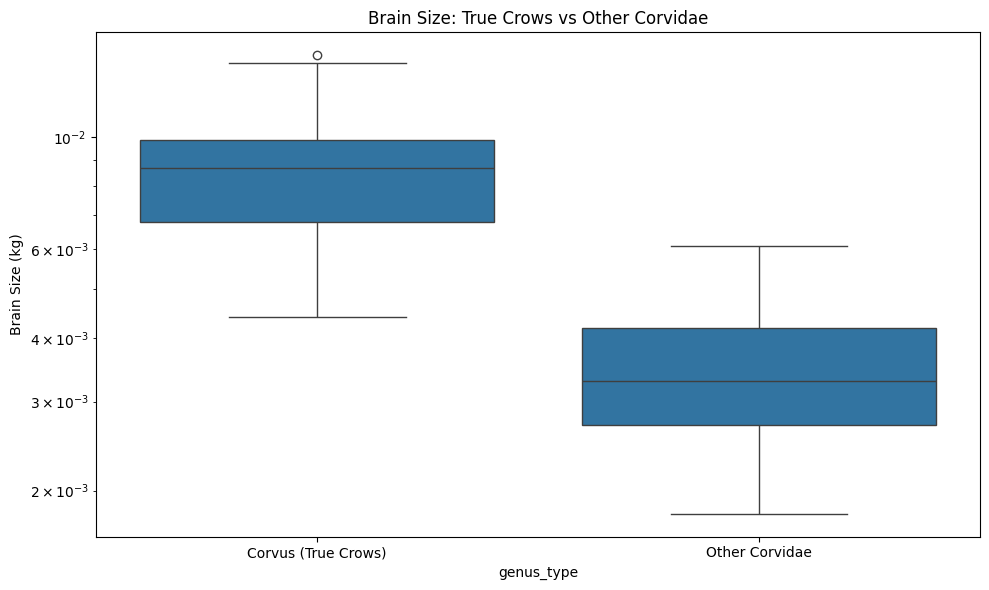


Top 10 bird families by average brain size:
              brain size                
                   count    mean     std
family                                  
Struthionidae          1  0.0421     NaN
Casuariidae            2  0.0338  0.0055
Bucorvidae             1  0.0262     NaN
Diomedeidae            4  0.0217  0.0052
Pelecanidae            2  0.0216  0.0059
Ciconiidae             4  0.0174  0.0095
Gruidae                5  0.0148  0.0048
Otididae               1  0.0121     NaN
Cacatuidae            14  0.0115  0.0046
Menuridae              2  0.0108  0.0004


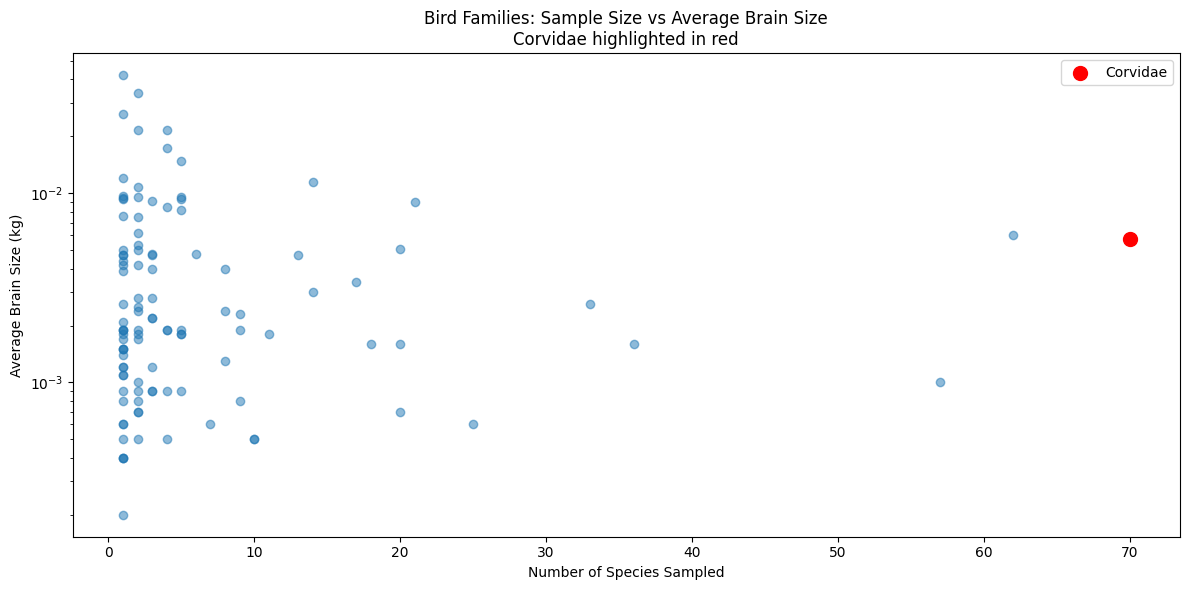


Key Findings about Corvidae:
- Number of Corvidae species in dataset: 72
- Average brain size of Corvidae: 0.005684 kg
- Range of brain sizes: 0.001800 to 0.014500 kg


In [ ]:
# Comprehensive analysis of Corvidae brain sizes

# 1. Organize data by genera within Corvidae
print("=== Analysis of Corvidae Brain Sizes ===\n")
corvidae_by_genus = corvidae_data.groupby('genus').agg({
    'brain size': ['count', 'mean', 'std']
}).round(4)
print("Brain sizes by genus within Corvidae:")
print(corvidae_by_genus)

# 2. Compare Corvus (true crows) to other Corvidae genera
corvidae_data['genus_type'] = corvidae_data['genus'].apply(
    lambda x: 'Corvus (True Crows)' if x == 'Corvus' else 'Other Corvidae')

plt.figure(figsize=(10, 6))
sns.boxplot(data=corvidae_data, x='genus_type', y='brain size')
plt.title('Brain Size: True Crows vs Other Corvidae')
plt.ylabel('Brain Size (kg)')
plt.yscale('log')
plt.tight_layout()
plt.show()

# 3. Compare Corvidae to similarly-sized bird families
bird_data = df[df['class'] == 'Aves'].copy()
family_stats = bird_data.groupby('family').agg({
    'brain size': ['count', 'mean', 'std']
}).round(4)
family_stats = family_stats.sort_values(('brain size', 'mean'), ascending=False)

# Print top 10 families by average brain size
print("\nTop 10 bird families by average brain size:")
print(family_stats.head(10))

# Create a scatter plot of species count vs average brain size by family
plt.figure(figsize=(12, 6))
plt.scatter(family_stats[('brain size', 'count')], 
           family_stats[('brain size', 'mean')],
           alpha=0.5)

# Highlight Corvidae
corvidae_stats = family_stats.loc['Corvidae']
plt.scatter(corvidae_stats[('brain size', 'count')], 
           corvidae_stats[('brain size', 'mean')],
           color='red', s=100, label='Corvidae')

plt.xlabel('Number of Species Sampled')
plt.ylabel('Average Brain Size (kg)')
plt.title('Bird Families: Sample Size vs Average Brain Size\nCorvidae highlighted in red')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

# Print key findings about Corvidae
print("\nKey Findings about Corvidae:")
print(f"- Number of Corvidae species in dataset: {len(corvidae_data)}")
print(f"- Average brain size of Corvidae: {corvidae_data['brain size'].mean():.6f} kg")
print(f"- Range of brain sizes: {corvidae_data['brain size'].min():.6f} to {corvidae_data['brain size'].max():.6f} kg")